In [1]:
#import library

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 

In [2]:
#read csv file
Amtrak = pd.read_csv("~/Downloads/Data Science/data set/Amtrak.csv")
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [3]:
p = Amtrak["Month"][0]
p[0:3]
Amtrak['months']= 0

In [4]:
for i in range(159):
    p = Amtrak["Month"][i]
    Amtrak['months'][i]= p[0:3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
month_dummies = pd.DataFrame(pd.get_dummies(Amtrak['months']))
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,0,0,0,0,1,0,0
155,0,0,1,0,0,0,0,0,0,0,0,0
156,0,0,0,0,1,0,0,0,0,0,0,0
157,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
Amtrak1 = pd.concat([Amtrak,month_dummies],axis = 1)
Amtrak1

,Month,Ridership,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-91,1621,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-91,1973,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-91,1812,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-91,1975,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,Nov,0,0,0,0,0,0,0,0,0,1,0,0
155,Dec-03,2141,Dec,0,0,1,0,0,0,0,0,0,0,0,0
156,Jan-04,1832,Jan,0,0,0,0,1,0,0,0,0,0,0,0
157,Feb-04,1838,Feb,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
Amtrak1["t"] = np.arange(1,160)
Amtrak1["t_squared"] = Amtrak1["t"]*Amtrak1["t"]
Amtrak1.columns

Index(['Month', 'Ridership ', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared'],
      dtype='object')

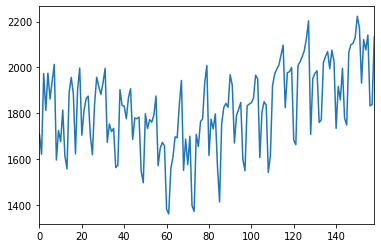

In [8]:
Amtrak1["log_Rider"] = np.log(Amtrak1["Ridership "])
Amtrak1.rename(columns={"Ridership ": 'Ridership'}, inplace=True)
Amtrak1.Ridership.plot()

In [9]:
Train = Amtrak1.head(147)
Test = Amtrak1.tail(12)

In [10]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

#LINEAR 
linear_model = smf.ols('Ridership~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [11]:
#Exponential
Exp = smf.ols('log_Rider~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263566813343

In [12]:
#Quadratic
Quad = smf.ols('Ridership~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356137

In [13]:
#Additive seasonality

add_sea = smf.ols('Ridership~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568775

In [14]:
# Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Ridership~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

50.60724584141619

In [15]:
# Multiplicative Seasonality

Mul_sea = smf.ols('log_Rider~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325309181

In [16]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Rider~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Ridership'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.76726784671988

In [17]:
# Testing
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
2,rmse_Quad,137.154627
3,rmse_add_sea,264.664390
4,rmse_add_sea_quad,50.607246
5,rmse_Mult_sea,268.197033
6,rmse_Mult_add_sea,172.767268
